# Time Series & Forecasting

‘Time’ is the most important factor which ensures success in a business. It’s difficult to keep up with the pace of time.  But, technology has developed some powerful methods using which we can ‘see things’ ahead of time. Don’t worry, we are not talking about Time Machine. Let’s be realistic here!

We are talking about the methods of prediction & forecasting. One such method, which deals with time based data is Time Series Modeling. As the name suggests, it involves working on time (years, days, hours, minutes) based data, to derive hidden insights to make informed decision making.

Time series models are very useful models when you have serially correlated data. Most of business houses work on time series data to analyze sales number for the next year, website traffic, competition position and much more. However, it is also one of the areas, which many analysts do not understand.

## What makes Time Series Special?

As the name suggests, Time Series is a collection of data points collected at constant time intervals. These are analyzed to determine the long term trend so as to forecast the future or perform some other form of analysis. But what makes a Time Series different from say a regular regression problem? There are 2 things:

1. It is time dependent. So the basic assumption of a linear regression model that the observations are independent doesn’t hold in this case.
2. Along with an increasing or decreasing trend, most TS have some form of seasonality trends, i.e. variations specific to a particular time frame. For example, if you see the sales of a woolen jacket over time, you will invariably find higher sales in winter seasons.

## Loading and Handling Time Series in Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
data=pd.read_csv('/content/DJI_UFO.csv')
df=data.copy()

In [3]:
print(df.shape)
print(df.dtypes)
df.head()

(73, 3)
Date      int64
DJI     float64
UFO       int64
dtype: object


,Date,DJI,UFO
0,1941,110.96,1
1,1942,119.40,2
2,1943,135.89,9
3,1944,152.32,9
4,1945,192.91,9


Converting Index to Date Time

In [4]:
df['Date']=pd.to_datetime(df['Date'], format='%Y')
df.index=df['Date']
df.drop('Date',axis=1,inplace=True)
df.head()

,DJI,UFO
Date,,
1941-01-01,110.96,1
1942-01-01,119.40,2
1943-01-01,135.89,9
1944-01-01,152.32,9
1945-01-01,192.91,9


Plotting Time Series

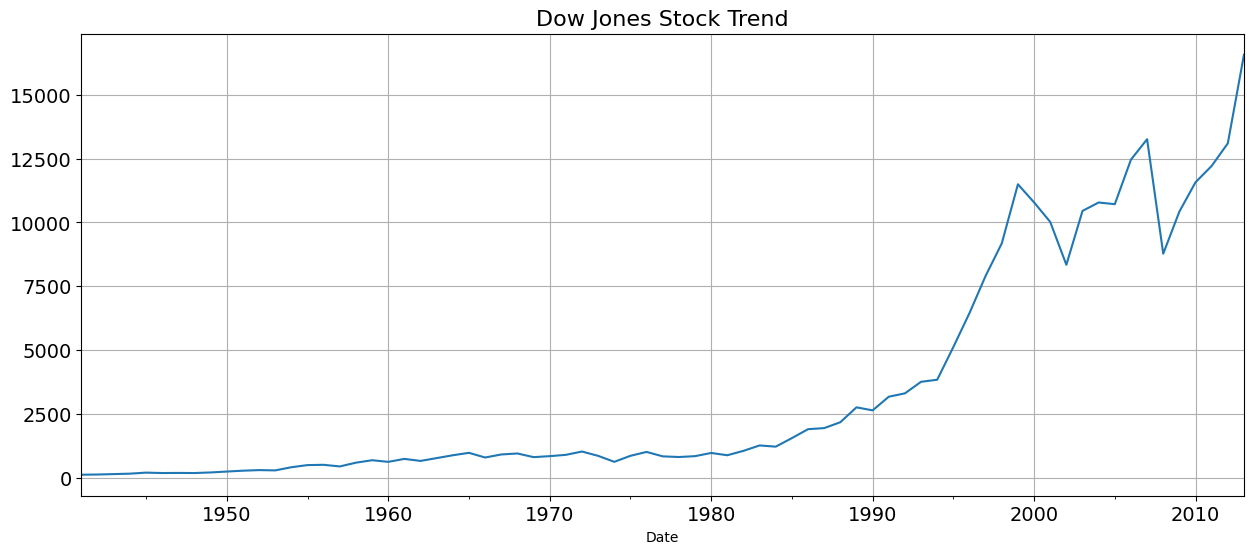

In [5]:
df.DJI.plot(figsize=(15,6), label='DOW Jones', fontsize=14, grid=True)
plt.title('Dow Jones Stock Trend', fontsize=16)
plt.show()

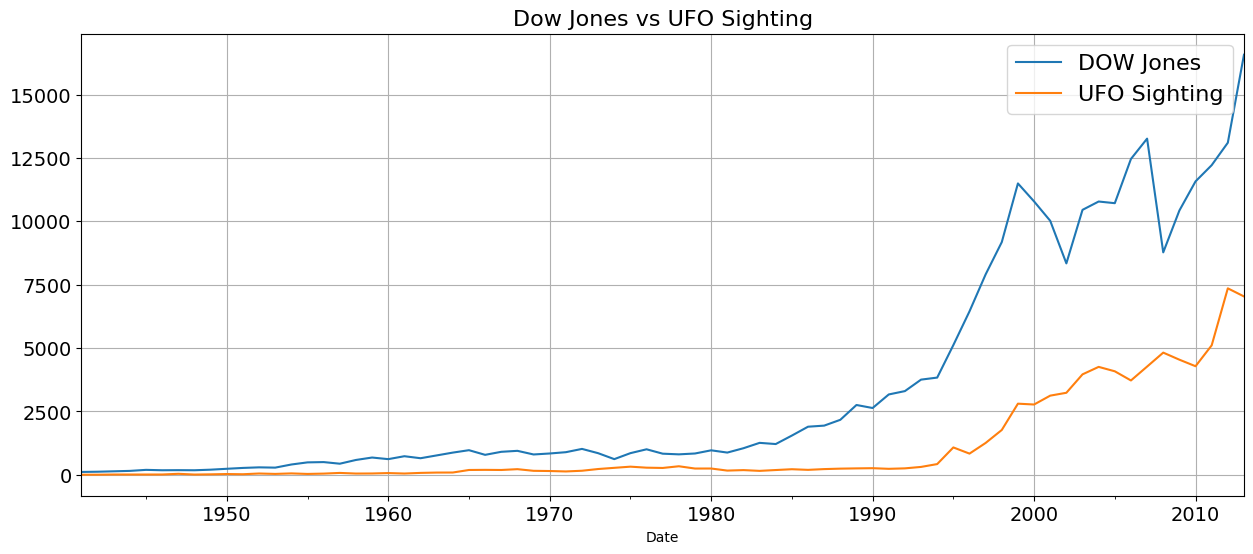

In [6]:
df.DJI.plot(figsize=(15,6), label='DOW Jones', fontsize=14, grid=True)
df.UFO.plot(figsize=(15,6), label='UFO Sighting', fontsize=14, grid=True)
plt.legend(fontsize=16)
plt.title('Dow Jones vs UFO Sighting',fontsize=16)
plt.show()

### Correlation of Trends

Correlation is: 0.94


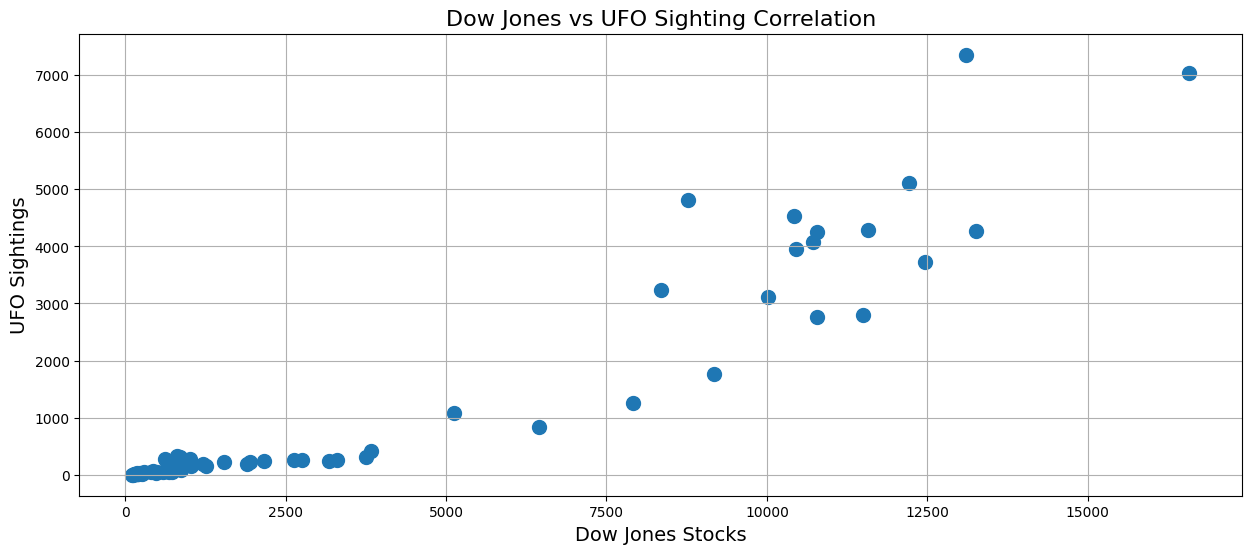

In [7]:
print('Correlation is: %0.2f'%df.DJI.corr(df.UFO))
plt.figure(figsize=(15,6))
plt.scatter(df.DJI, df.UFO,s=100)
plt.grid(True)
plt.xlabel('Dow Jones Stocks',fontsize=14)
plt.ylabel('UFO Sightings',fontsize=14)
plt.title('Dow Jones vs UFO Sighting Correlation',fontsize=16)
plt.show()

For Time Series, we look for correlation between **Percentage of Change** in trend

In [8]:
df_pct=df.pct_change()

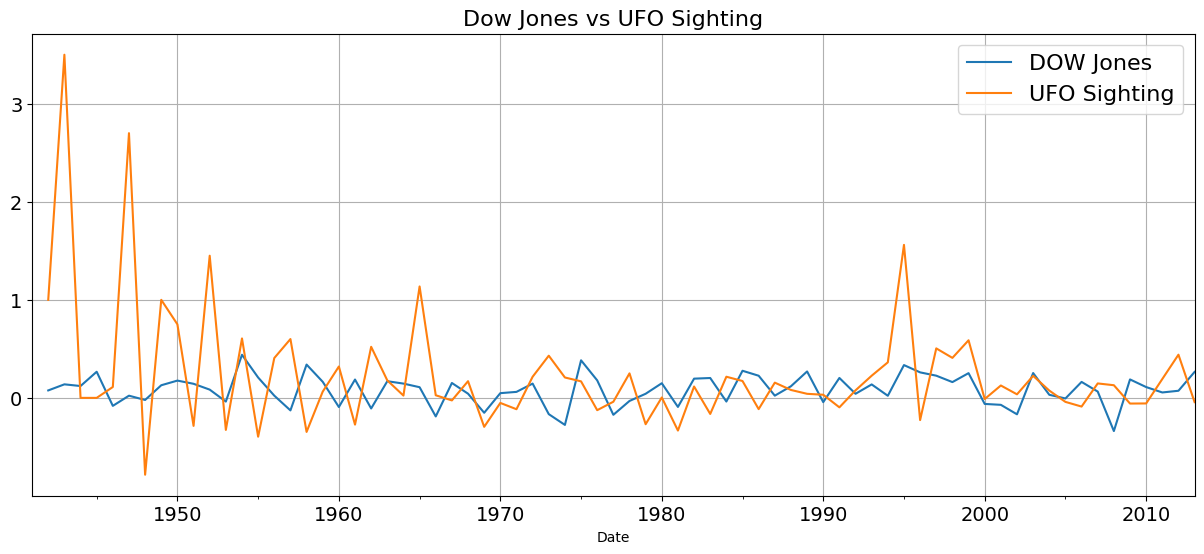

In [9]:
df_pct.DJI.plot(figsize=(15,6), label='DOW Jones', fontsize=14, grid=True)
df_pct.UFO.plot(figsize=(15,6), label='UFO Sighting', fontsize=14, grid=True)
plt.legend(fontsize=16)
plt.title('Dow Jones vs UFO Sighting',fontsize=16)
plt.show()

Correlation is: 0.06


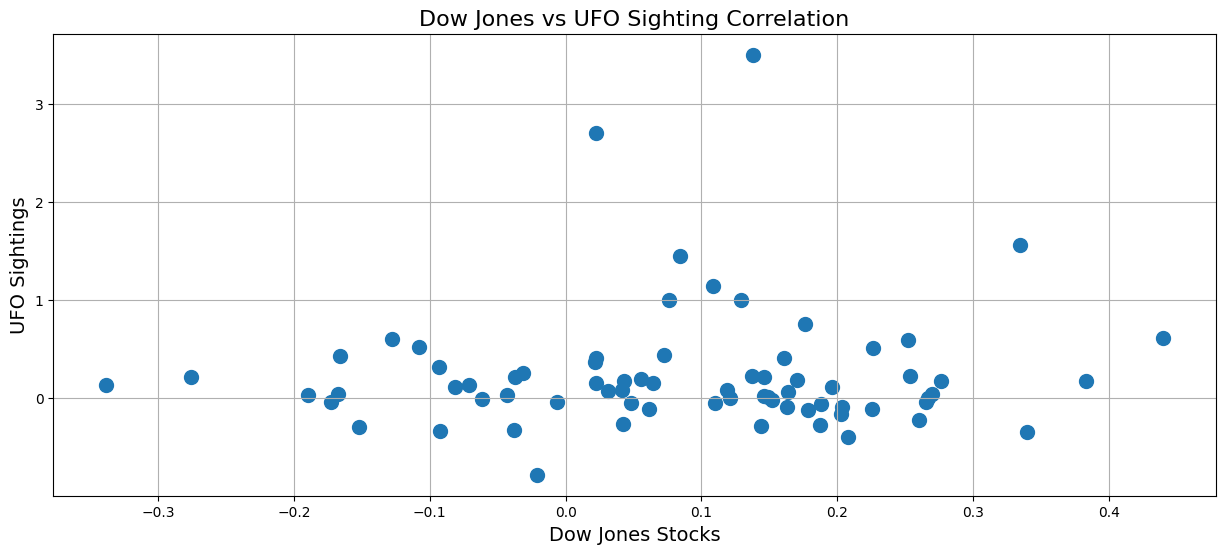

In [10]:
print('Correlation is: %0.2f'%df_pct.DJI.corr(df_pct.UFO))
plt.figure(figsize=(15,6))
plt.scatter(df_pct.DJI, df_pct.UFO,s=100)
plt.grid(True)
plt.xlabel('Dow Jones Stocks',fontsize=14)
plt.ylabel('UFO Sightings',fontsize=14)
plt.title('Dow Jones vs UFO Sighting Correlation',fontsize=16)
plt.show()

# Multiple Forecasting Techniques

* Naive Approach
* Simple average
* Moving average
* Single Exponential smoothing
* Holt’s Linear method
* Holt’s Winter seasonal method
* ARIMA
* SARIMAX

We are provided with a Time Series problem involving prediction of number of commuters of JetRail, a new high speed rail service by Unicorn Investors. We are provided with 2 years of data(Aug 2012-Sept 2014) and using this data we have to forecast the number of commuters for next 7 months.

In [11]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y %H:%M')

In [15]:

import pandas as pd
from datetime import datetime

# Define dateparse using the correct datetime import
dateparse = lambda dates: datetime.strptime(dates, '%d-%m-%Y %H:%M')

# Read the CSV file, using only parse_dates (without date_parser)
data = pd.read_csv('/content/Train_SU63ISt.csv', parse_dates=['Datetime'], index_col='Datetime')

# Create a copy of the dataframe
df = data.copy()

# Display the first few rows
df.head()


<ipython-input-15-4c169367a332>:8: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv('/content/Train_SU63ISt.csv', parse_dates=['Datetime'], index_col='Datetime')


,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2


In [16]:
df.tail()

,ID,Count
Datetime,,
2014-09-25 19:00:00,18283,868
2014-09-25 20:00:00,18284,732
2014-09-25 21:00:00,18285,702
2014-09-25 22:00:00,18286,580
2014-09-25 23:00:00,18287,534


As seen from the print statements above, we are given 2 years of data(2012-2014) at hourly level with the number of commuters travelling and we need to estimate the number of commuters for future.

We are subsetting and aggregating dataset at daily basis to explain the different methods.

* Subsetting the dataset from (August 2012 – Dec 2013)
* Creating train and test file for modeling. The first 14 months (August 2012 – October 2013) are used as training data and next 2 months (Nov 2013 – Dec 2013) as testing data.
* Aggregating the dataset at daily basis

In [17]:
df=df['Aug 2012':'Dec 2013']

In [18]:
df.head()
#df.tail()

,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2


Train-Test Split

In [19]:
train=df['Aug 2012':'Oct 2013']
test=df['Nov 2013':'Dec 2013']

Aggregation on day level

In [20]:
df = df.resample('D').mean()
train = train.resample('D').mean()
test = test.resample('D').mean()

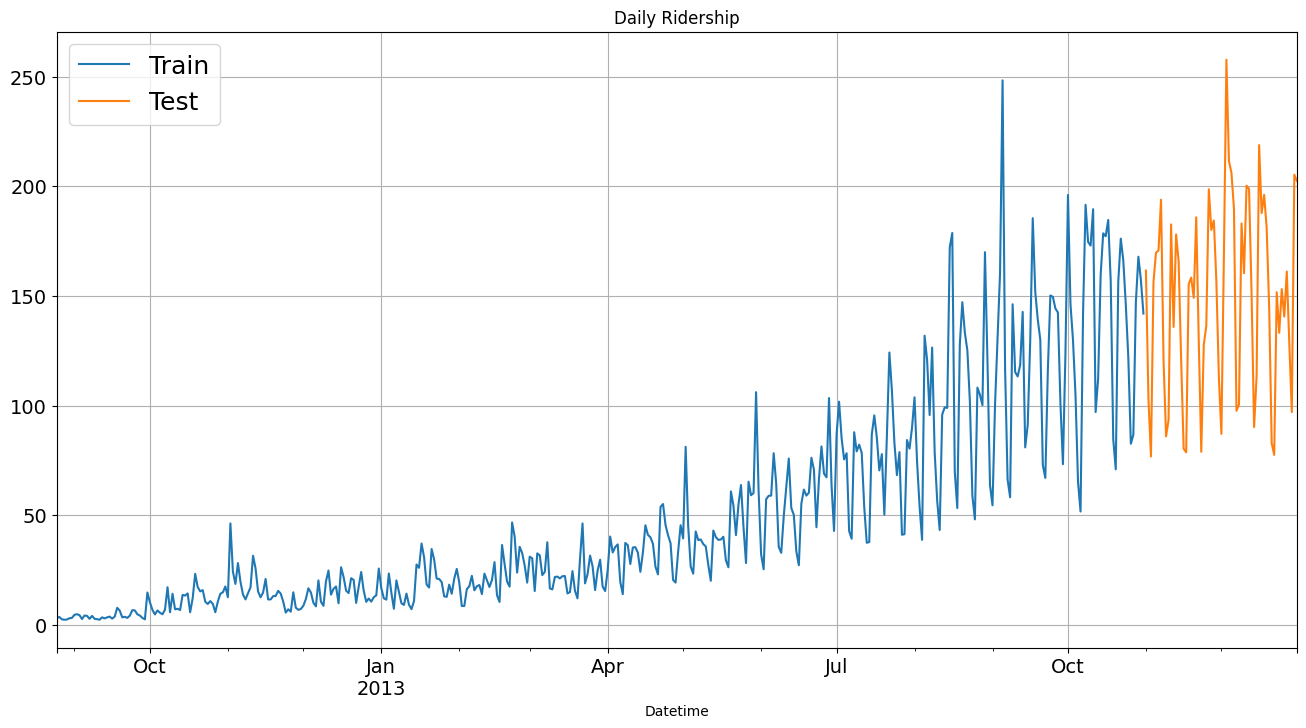

In [21]:
train.Count.plot(figsize=(16,8), title= 'Daily Ridership', label='Train',fontsize=14)
test.Count.plot(figsize=(16,8), title= 'Daily Ridership', label='Test',fontsize=14)
plt.legend(loc='best',fontsize=18)
plt.grid(True)
plt.show()

## 1. Naive Approach

Consider the graph given below. Let’s assume that the y-axis depicts the price of a coin and x-axis depicts the time (days).

<img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/02/naive_new-768x495.png'>

We can infer from the graph that the price of the coin is stable from the start. Many a times we are provided with a dataset, which is stable throughout it’s time period. If we want to forecast the price for the next day, we can simply take the last day value and estimate the same value for the next day. Such forecasting technique which assumes that the next expected point is equal to the last observed point is called Naive Method.

<img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/01/Screen-Shot-2018-01-25-at-7.45.20-PM.png'>

Now we will implement the Naive method to forecast the prices for test data.

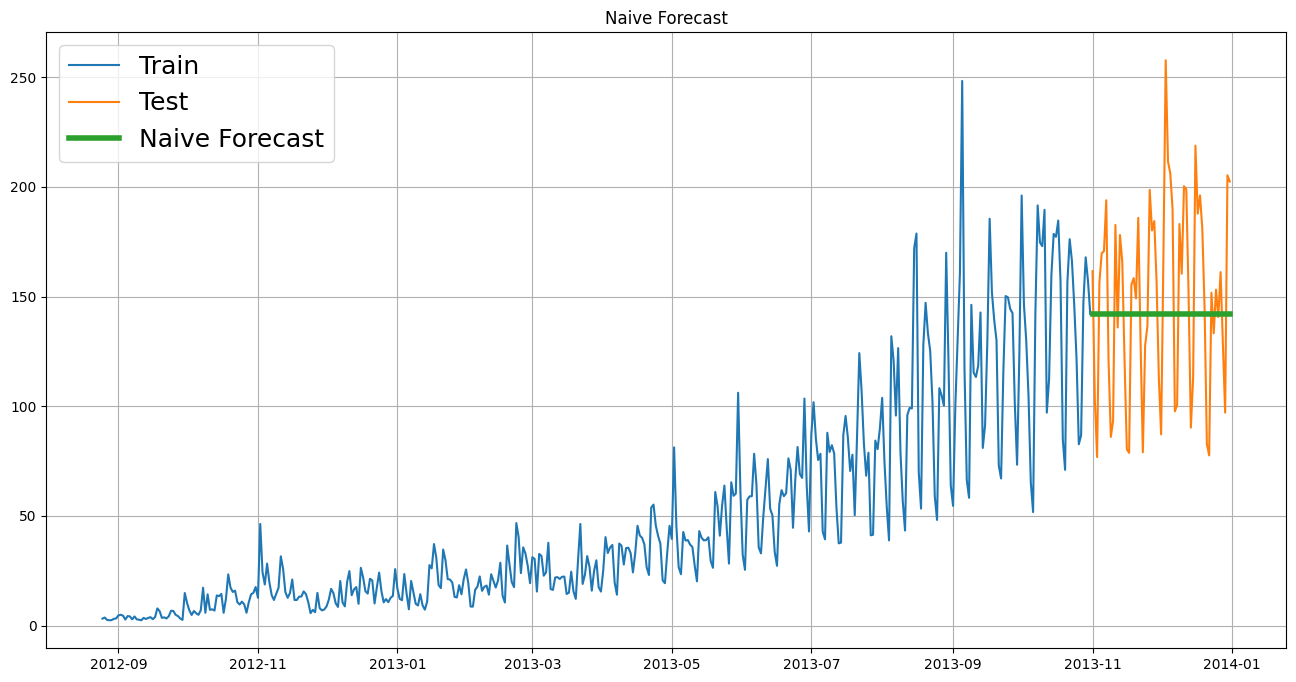

In [22]:
dd= np.asarray(train.Count)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(16,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast',linewidth=4)
plt.legend(loc='best',fontsize=18)
plt.title("Naive Forecast")
plt.grid(True)
plt.show()

We will now calculate RMSE to check to accuracy of our model on test data set.

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms_naive = sqrt(mean_squared_error(test.Count, y_hat.naive))
print('RMSE=',rms_naive)

RMSE= 43.91640614391676


We can infer from the RMSE value and the graph above, that Naive method isn’t suited for datasets with high variability. It is best suited for stable datasets. We can still improve our score by adopting different techniques. Now we will look at another technique and try to improve our score.

## 2. Simple Average

Consider the graph given below. Let’s assume that the y-axis depicts the price of a coin and x-axis depicts the time(days).

<img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/02/avg_orig_new1-768x510.png'>

We can infer from the graph that the price of the coin is increasing and decreasing randomly by a small margin, such that the average remains constant. Many a times we are provided with a dataset, which though varies by a small margin throughout it’s time period, but the average at each time period remains constant. In such a case we can forecast the price of the next day somewhere similar to the average of all the past days.

Such forecasting technique which forecasts the expected value equal to the average of all previously observed points is called Simple Average technique.

<img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/01/Screen-Shot-2018-01-25-at-7.45.10-PM-300x82.png'>

We take all the values previously known, calculate the average and take it as the next value. Of course it won’t be it exact, but somewhat close. As a forecasting method, there are actually situations where this technique works the best.

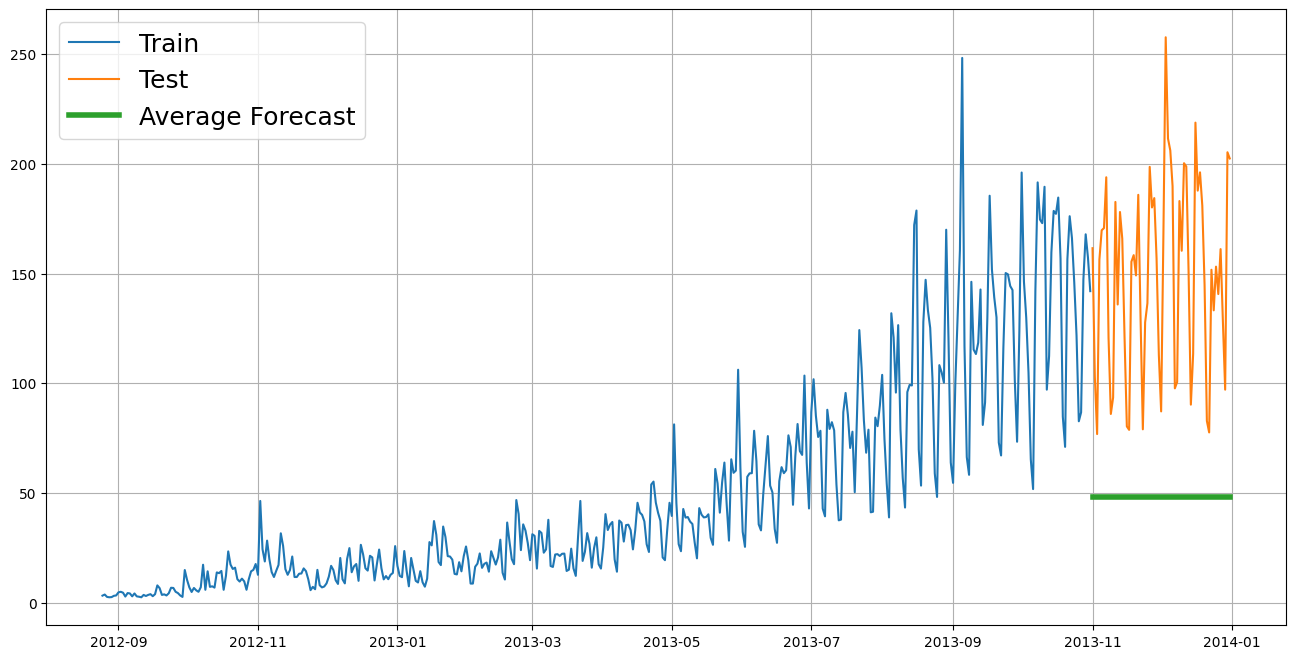

In [24]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Count'].mean()
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast',linewidth=4)
plt.grid(True)
plt.legend(loc='best',fontsize=18)
plt.show()

We will now calculate RMSE to check to accuracy of our model.

In [25]:
rms_avg = sqrt(mean_squared_error(test.Count, y_hat_avg.avg_forecast))
print('RMS=',rms_avg)

RMS= 109.88526527082863


We can see that this model didn’t improve our score. Hence we can infer from the score that this method works best when the average at each time period remains constant. Though the score of Naive method is better than Average method, but this does not mean that the Naive method is better than Average method on all datasets. We should move step by step to each model and confirm whether it improves our model or not.

## 3. Moving Average

Consider the graph given below. Let’s assume that the y-axis depicts the price of a coin and x-axis depicts the time(days).

<img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/02/mov_avg_new-300x208.png' style="width: 500px;height: 350px">

We can infer from the graph that the prices of the coin increased some time periods ago by a big margin but now they are stable. Many a times we are provided with a dataset, in which the prices/sales of the object increased/decreased sharply some time periods ago. In order to use the  previous Average method, we have to use the mean of all the previous data, but using all the previous data doesn’t sound right.

Using the prices of the initial period would highly affect the forecast for the next period. Therefore as an improvement over simple average, we will take the average of the prices for last few time periods only. Obviously the thinking here is that only the recent values matter. Such forecasting technique which uses window of time period for calculating the average is called Moving Average technique. Calculation of the moving average involves what is sometimes called a “sliding window” of size n.

Using a simple moving average model, we forecast the next value(s) in a time series based on the average of a fixed finite number ‘p’ of the previous values. Thus, for all i > p

<img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/01/Screen-Shot-2018-01-25-at-7.47.33-PM.png'>

A moving average can actually be quite effective, especially if you pick the right p for the series.

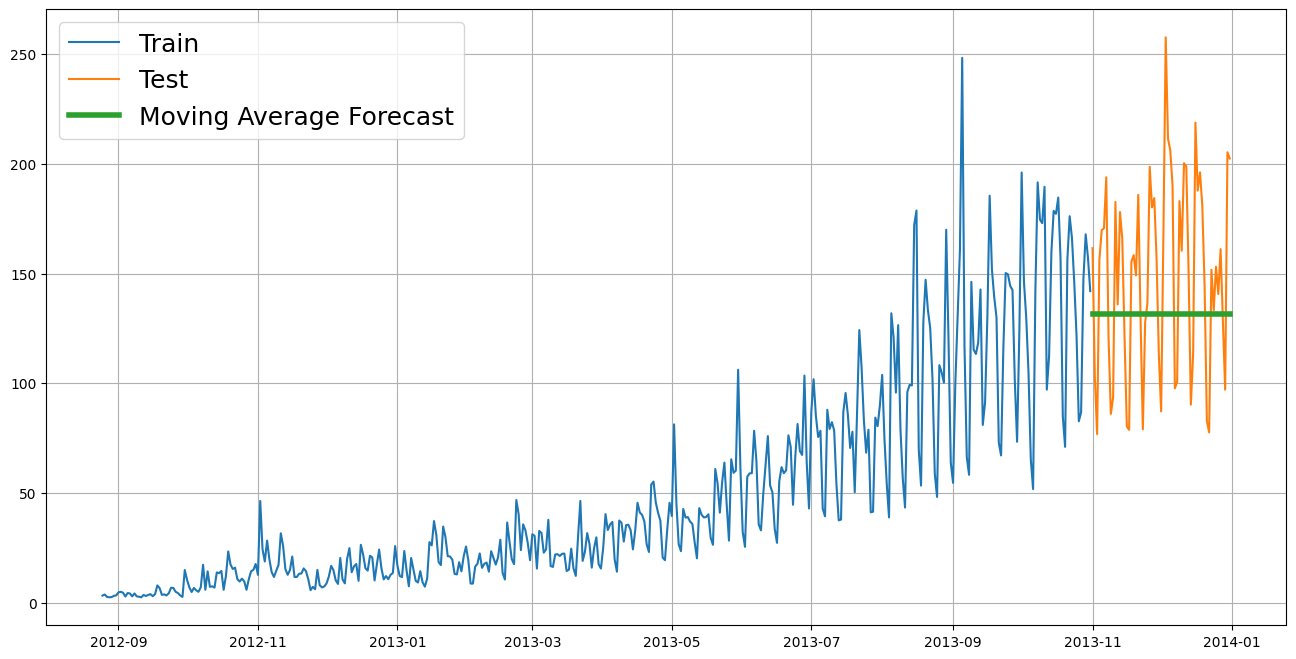

In [26]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast',linewidth=4)
plt.grid(True)
plt.legend(loc='best',fontsize=18)
plt.show()

We chose the data of last 2 months only. We will now calculate RMSE to check to accuracy of our model.

In [27]:
rms_ma = sqrt(mean_squared_error(test.Count, y_hat_avg.moving_avg_forecast))
print('RMS=',rms_ma)

RMS= 46.72840725106963


An advancement over Moving average method is Weighted moving average method. In the Moving average method as seen above, we equally weigh the past ‘n’ observations. But we might encounter situations where each of the observation from the past ‘n’ impacts the forecast in a different way. Such a technique which weighs the past observations differently is called Weighted Moving Average technique.

A weighted moving average is a moving average where within the sliding window values are given different weights, typically so that more recent points matter more.

<img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/01/nnn-768x84.png'>

Instead of selecting a window size, it requires a list of weights (which should add up to 1). For example if we pick [0.40, 0.25, 0.20, 0.15] as weights, we would be giving 40%, 25%, 20% and 15% to the last 4 points respectively.

## 4. Simple Exponential Smoothing

After we have understood the above methods, we can note that both Simple average and Weighted moving average lie on completely opposite ends. We would need something between these two extremes approaches which takes into account all the data while weighing the data points differently. For example it may be sensible to attach larger weights to more recent observations than to observations from the distant past. The technique which works on this principle is called Simple exponential smoothing. Forecasts are calculated using weighted averages where the weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations:

<img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/01/Screen-Shot-2018-01-25-at-7.59.27-PM-768x90.png'>

where 0≤ α ≤1 is the smoothing parameter.

The one-step-ahead forecast for time T+1 is a weighted average of all the observations in the series y1,…,yT. The rate at which the weights decrease is controlled by the parameter α.

If you stare at it just long enough, you will see that the expected value ŷx is the sum of two products: α⋅yt and (1−α)⋅ŷ t-1.

Hence, it can also be written as :

<img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/01/Screen-Shot-2018-01-25-at-7.59.43-PM.png'>

So essentially we’ve got a weighted moving average with two weights: α and 1−α.

As we can see, 1−α is multiplied by the previous expected value ŷ x−1 which makes the expression recursive. And this is why this method is called Exponential. The forecast at time t+1 is equal to a weighted average between the most recent observation yt and the most recent forecast ŷ t|t−1.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


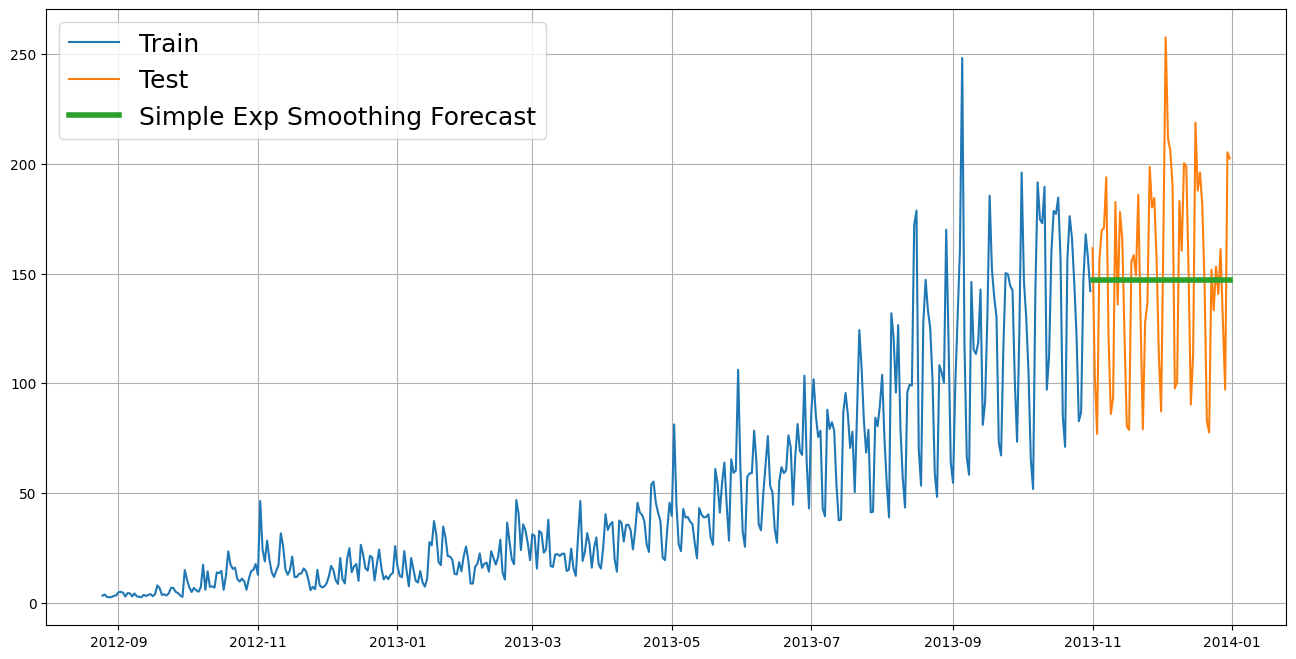

In [28]:
from statsmodels.tsa.api import SimpleExpSmoothing
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.6)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SES'], label='Simple Exp Smoothing Forecast',linewidth=4)
plt.grid(True)
plt.legend(loc='best',fontsize=18)
plt.show()

We will now calculate RMSE to check to accuracy of our model.

In [29]:
rms_ses = sqrt(mean_squared_error(test.Count, y_hat_avg.SES))
print("RMSE",rms_ses)

RMSE 43.357625225228155


## 5. Holt’s Linear Trend method

We have now learnt several methods to forecast but we can see that these models don’t work well on data with high variations. Consider that the price of the bitcoin is increasing.

<img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/02/hl_new-768x408.png'>

If we use any of the above methods, it won’t take into account this trend. Trend is the general pattern of prices that we observe over a period of time. In this case we can see that there is an increasing trend.

Although each one of these methods can be applied to the trend as well.  E.g. the Naive method would assume that trend between last two points is going to stay the same, or we could average all slopes between all points to get an average trend, use a moving trend average or apply exponential smoothing.

But we need a method that can map the trend accurately without any assumptions. Such a method that takes into account the trend of the dataset is called Holt’s Linear Trend method.

Each Time series dataset can be decomposed into it’s componenets which are Trend, Seasonality and Residual. Any dataset that follows a trend can use Holt’s linear trend method for forecasting.

In [30]:
import statsmodels.api as sm
res=sm.tsa.seasonal_decompose(train.Count)

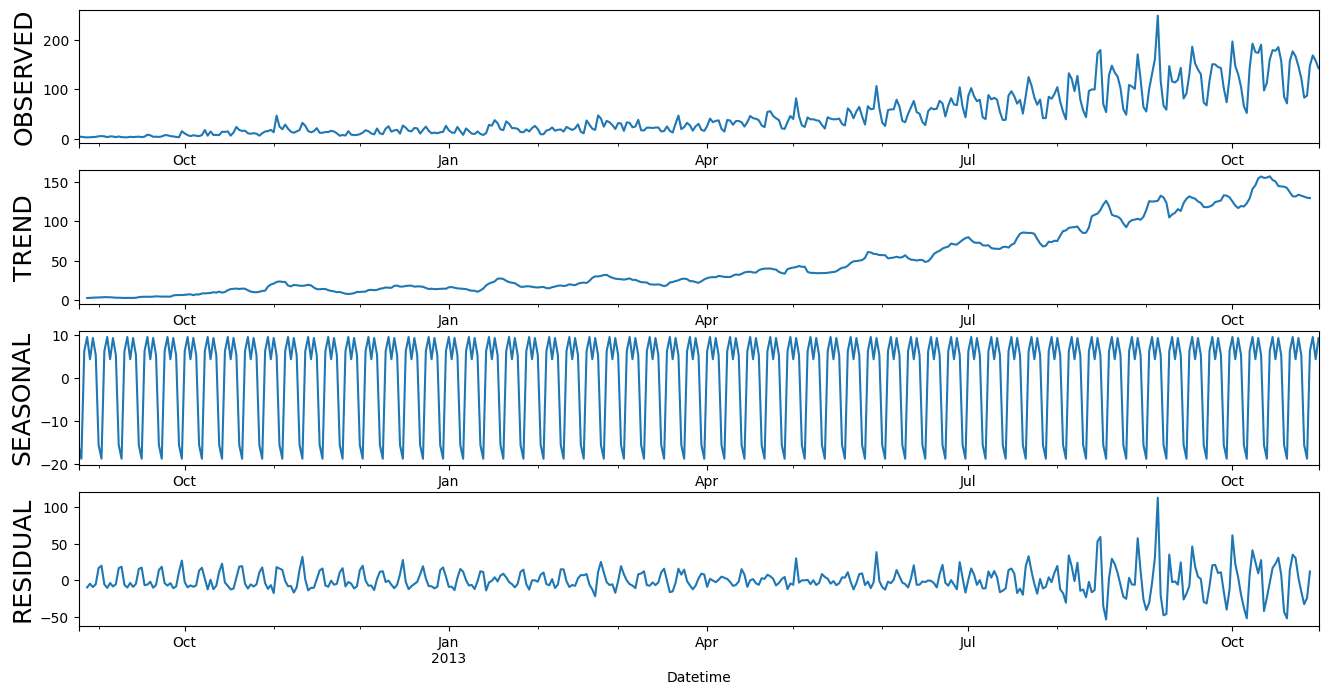

In [31]:
plt.figure(figsize=(16,8))
plt.subplot(4,1,1)
res.observed.plot()
plt.ylabel('OBSERVED',fontsize=18)
plt.subplot(4,1,2)
res.trend.plot()
plt.ylabel('TREND',fontsize=18)
plt.subplot(4,1,3)
res.seasonal.plot()
plt.ylabel('SEASONAL',fontsize=18)
plt.subplot(4,1,4)
res.resid.plot()
plt.ylabel('RESIDUAL',fontsize=18)
plt.show()

We can see from the graphs obtained that this dataset follows an increasing trend. Hence we can use Holt’s linear trend to forecast the future prices.

Holt extended simple exponential smoothing to allow forecasting of data with a trend. It is nothing more than exponential smoothing applied to both level(the average value in the series) and trend. To express this in mathematical notation we now need three equations: one for level, one for the trend and one to combine the level and trend to get the expected forecast ŷ

<img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/02/eq-300x124.png' style="width: 500px;height: 200px">

We will add these equations to generate Forecast equation.

<ipython-input-32-439eff4b988d>:5: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


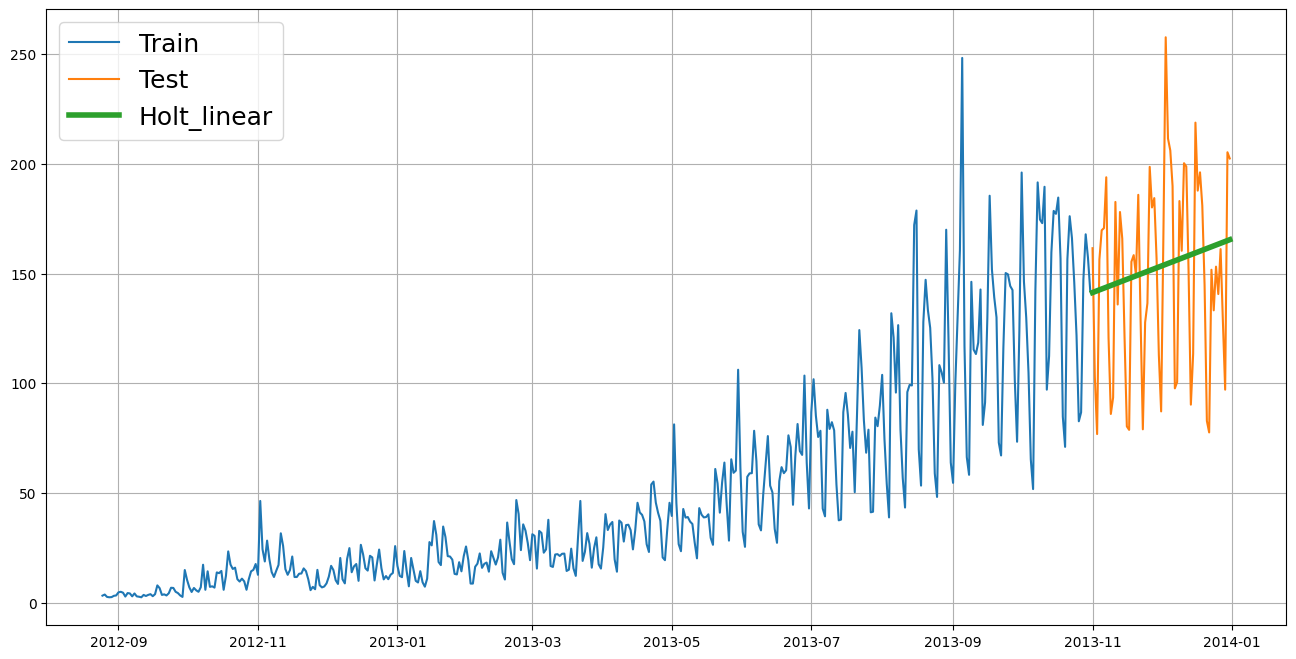

In [32]:
from statsmodels.tsa.api import Holt

y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear',linewidth=4)
plt.grid(True)
plt.legend(loc='best',fontsize=18)
plt.show()

We will now calculate RMSE to check to accuracy of our model.

In [33]:
rms_holt_lin = sqrt(mean_squared_error(test.Count, y_hat_avg.Holt_linear))
print("RMSE=",rms_holt_lin)

RMSE= 43.056259611507286


## 5. Holt-WintersMethod

So let’s introduce a new term which will be used in this algorithm. Consider a hotel located on a hill station. It experiences high visits during the summer season whereas the visitors during the rest of the year are comparatively very less. Hence the profit earned by the owner will be far better in summer season than in any other season. This pattern will repeat itself every year. Such a repetition is called Seasonality. Datasets which show a similar set of pattern after fixed intervals of a time period suffer from seasonality.

<img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/01/Picture1.jpg' style="width: 600px;height: 300px">

The above mentioned models don’t take into account the seasonality of the dataset while forecasting. Hence we need a method that takes into account both trend and seasonality to forecast future prices. One such algorithm that we can use in such a scenario is Holt’s Winter method. The idea behind triple exponential smoothing(Holt’s Winter) is to apply exponential smoothing to the seasonal components in addition to level and trend.

Using Holt’s winter method will be the best option among the rest of the models beacuse of the seasonality factor. The Holt-Winters seasonal method comprises the forecast equation and three smoothing equations — one for the level ℓt, one for trend bt and one for the seasonal component denoted by st, with smoothing parameters α, β and γ.

<img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/01/eq.png'>

where s is the length of the seasonal cycle, for 0 ≤ α ≤ 1, 0 ≤ β ≤ 1 and 0 ≤ γ ≤ 1.

The level equation shows a weighted average between the seasonally adjusted observation and the non-seasonal forecast for time t. The trend equation is identical to Holt’s linear method. The seasonal equation shows a weighted average between the current seasonal index, and the seasonal index of the same season last year (i.e., s time periods ago).

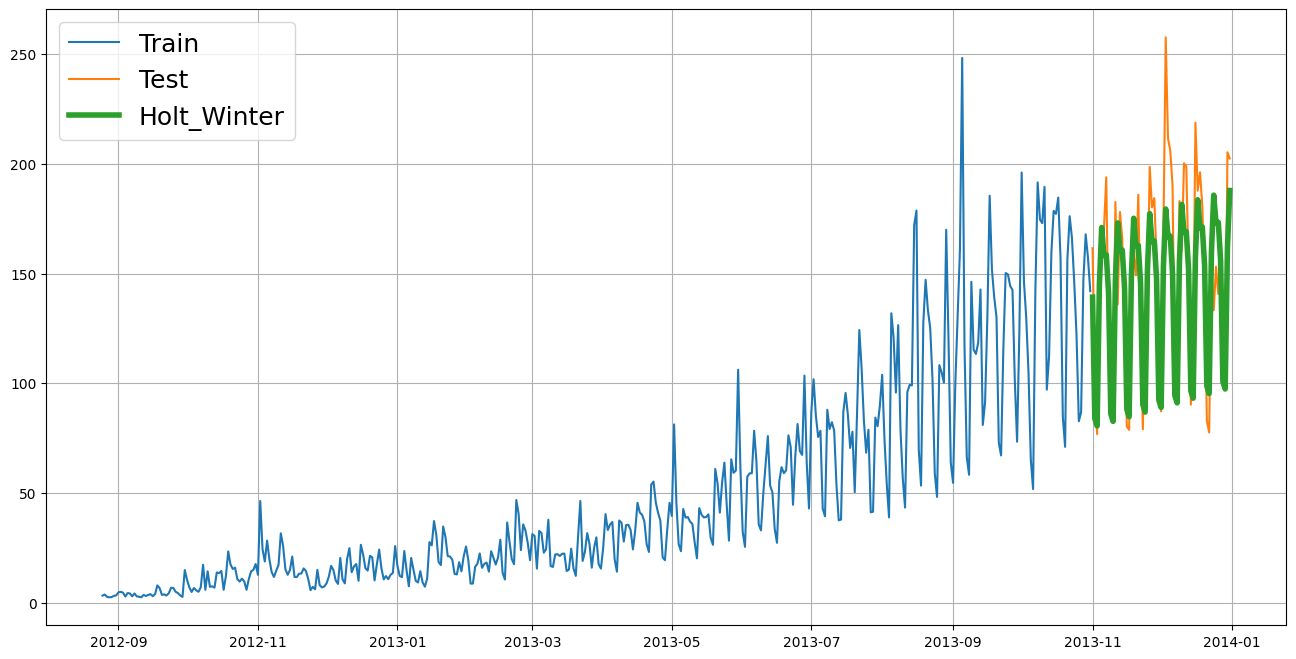

In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Count']) ,seasonal_periods=7,seasonal='add',trend='add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter',linewidth=4)
plt.grid(True)
plt.legend(loc='best',fontsize=18)
plt.show()

We will now calculate RMSE to check to accuracy of our model.

In [35]:
rms_holt_win = sqrt(mean_squared_error(test.Count, y_hat_avg.Holt_Winter))
print("RMSE=",rms_holt_win)

RMSE= 25.264160714051183


## 6. ARIMA

Another common Time series model that is very popular among the Data scientists is ARIMA. It stand for **Autoregressive Integrated Moving average**. While exponential smoothing models were based on a description of trend and seasonality in the data, ARIMA models aim to describe the correlations in the data with each other. An improvement over ARIMA is Seasonal ARIMA. It takes into account the seasonality of dataset just like Holt’ Winter method.

In [37]:
from statsmodels.tsa.arima.model import ARIMA  # Updated import
y_hat_avg = test.copy()
model = ARIMA(train['Count'], order=(2, 1, 2))  # Ensure 'Count' is referenced correctly
model_fit = model.fit()

# You can now make predictions or analyze the model_fit object.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [38]:
model_fit.predict(start='2013-11-01',end='2013-11-05',typ='levels')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,predicted_mean
2013-11-01,124.747015
2013-11-02,120.392513
2013-11-03,126.673180
2013-11-04,135.395404
2013-11-05,140.011383


In [39]:
y_hat_avg['ARIMA']=model_fit.forecast(len(test))[0]

<ipython-input-39-789e97c9b808>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat_avg['ARIMA']=model_fit.forecast(len(test))[0]


In [41]:
# Get forecast results with confidence intervals for 61 steps
forecast_results = model_fit.get_forecast(steps=61)

# Extract the confidence intervals
confidence_intervals = forecast_results.conf_int()

# Extract the lower bound (2.5% CI)
y_hat_avg['2.5% CI'] = confidence_intervals.iloc[:, 0]


In [43]:
# Get forecast results with confidence intervals for 61 steps
forecast_results = model_fit.get_forecast(steps=61)

# Extract the confidence intervals
confidence_intervals = forecast_results.conf_int()

# Extract the upper bound (97.5% CI)
y_hat_avg['97.5% CI'] = confidence_intervals.iloc[:, 1]


In [52]:
# Get forecast results with confidence intervals for 61 steps
forecast_results = model_fit.get_forecast(steps=61)

# Extract the confidence intervals
confidence_intervals = forecast_results.conf_int()

# Extract the upper bound (97.5% CI)
y_hat_avg['97.5% CI'] = confidence_intervals.iloc[:, 1]


In [44]:
y_hat_avg.head()

,ID,Count,ARIMA,2.5% CI,97.5% CI
Datetime,,,,,
2013-11-01,10403.5,161.583333,124.747015,89.358189,160.135841
2013-11-02,10427.5,103.083333,124.747015,79.858816,160.926210
2013-11-03,10451.5,76.833333,124.747015,86.128467,167.217892
2013-11-04,10475.5,156.416667,124.747015,94.116068,176.674739
2013-11-05,10499.5,169.750000,124.747015,98.462969,181.559797


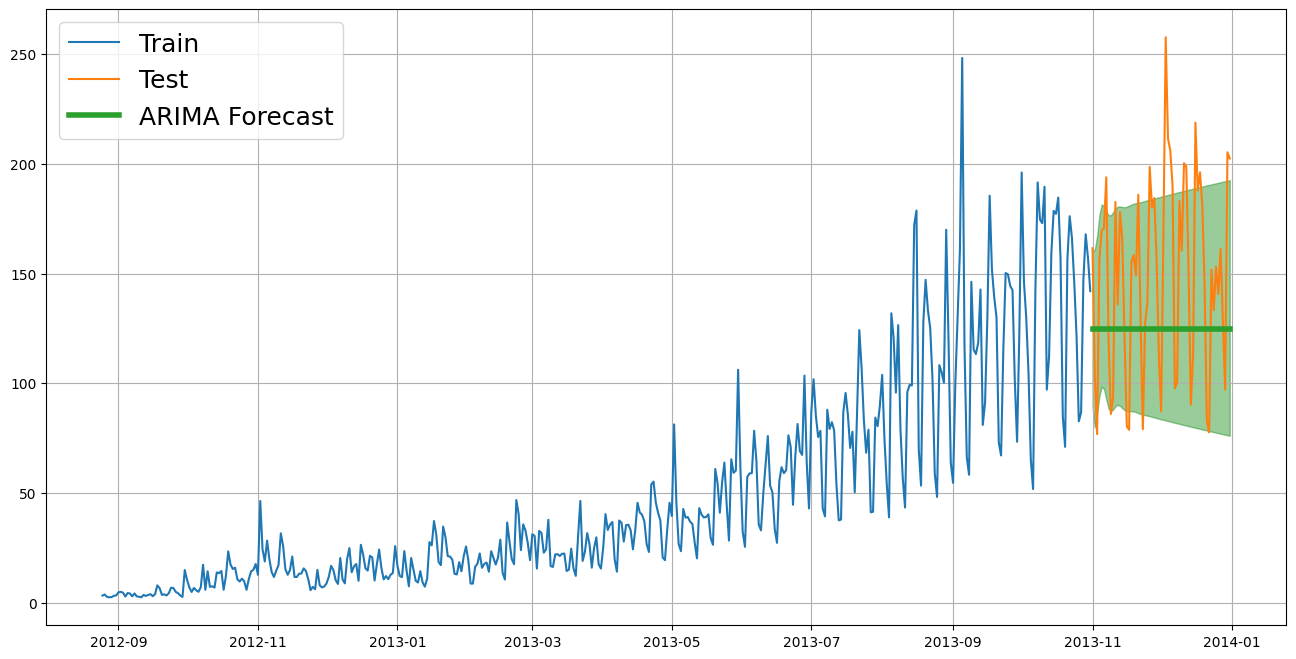

In [45]:
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['ARIMA'], label='ARIMA Forecast',linewidth=4)
plt.fill_between(y_hat_avg.index,y1=y_hat_avg['2.5% CI'],y2=y_hat_avg['97.5% CI'],alpha=0.4,color='green')
plt.grid(True)
plt.legend(loc='best',fontsize=18)
plt.show()

We will now calculate RMSE to check to accuracy of our model.

In [46]:
rms_arima = sqrt(mean_squared_error(test.Count, y_hat_avg.ARIMA))
print("RMSE=",rms_arima)

RMSE= 49.79127892971402


## 7. SARIMAX

Just like ARIMA, SARIMAX consider seasonality as well.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


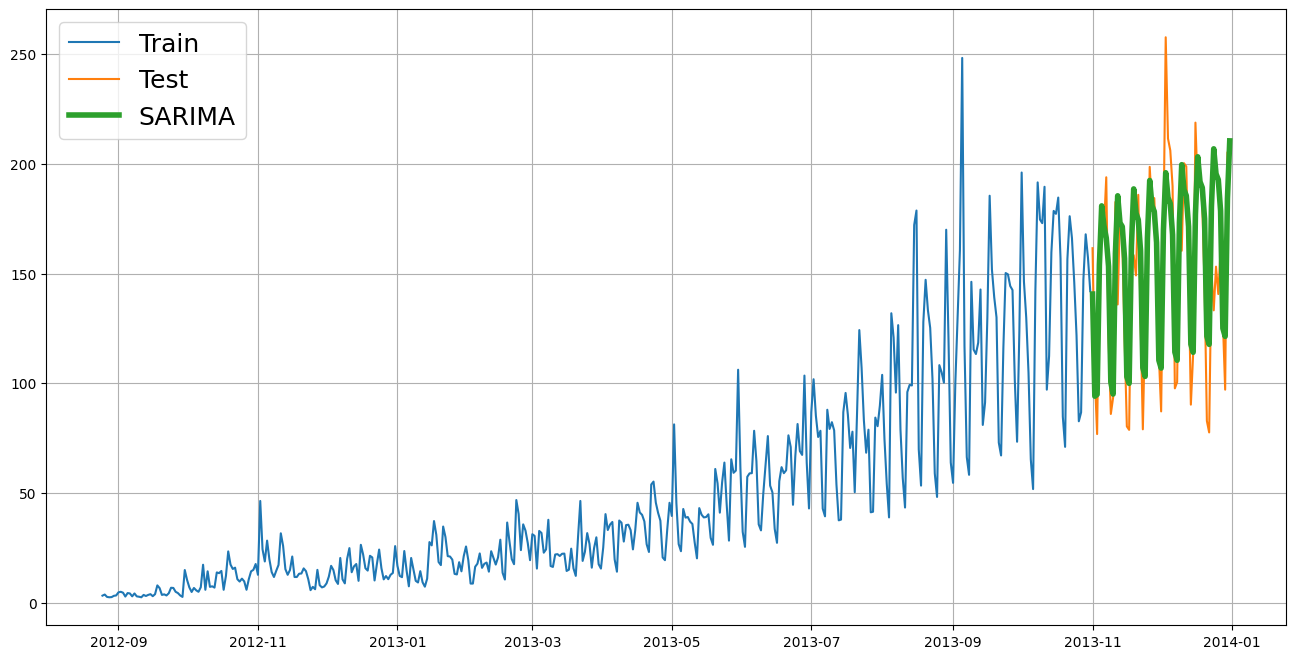

In [47]:

y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2013-11-1", end="2013-12-31", dynamic=True)

plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA',linewidth=4)
plt.grid(True)
plt.legend(loc='best',fontsize=18)
plt.show()

In [48]:
rms_sarima = sqrt(mean_squared_error(test.Count, y_hat_avg.SARIMA))
print("RMSE=",rms_sarima)

RMSE= 26.043328020602647


# Forecast Models Comparison

In [49]:
models=['Naive','Simple Average','Moving Average','Simple Exponential Smoothing','Holt Linear','Holt Winter','ARIMA','SARIMAX']

In [50]:
rms=[rms_naive,rms_avg,rms_ma,rms_ses,rms_holt_lin,rms_holt_win,rms_arima,rms_sarima]

In [53]:
compasrison=pd.DataFrame({"Forecast Model Name":models,"Root Means Square Error":rms})

compasrison

,Forecast Model Name,Root Means Square Error
0,Naive,43.916406
1,Simple Average,109.885265
2,Moving Average,46.728407
3,Simple Exponential Smoothing,43.357625
4,Holt Linear,43.056260
5,Holt Winter,25.264161
6,ARIMA,49.791279
7,SARIMAX,26.043328
